(array([ 2.,  2.,  1.,  4.,  4.,  9., 12., 16., 29., 46., 52., 54., 63.,
        74., 80., 71., 80., 54., 68., 60., 64., 61., 28., 26., 16., 12.,
         5.,  2.,  1.,  4.]),
 array([-3.20326547, -3.00216617, -2.80106686, -2.59996756, -2.39886826,
        -2.19776895, -1.99666965, -1.79557034, -1.59447104, -1.39337173,
        -1.19227243, -0.99117312, -0.79007382, -0.58897452, -0.38787521,
        -0.18677591,  0.0143234 ,  0.2154227 ,  0.41652201,  0.61762131,
         0.81872061,  1.01981992,  1.22091922,  1.42201853,  1.62311783,
         1.82421714,  2.02531644,  2.22641575,  2.42751505,  2.62861435,
         2.82971366]),
 <BarContainer object of 30 artists>)

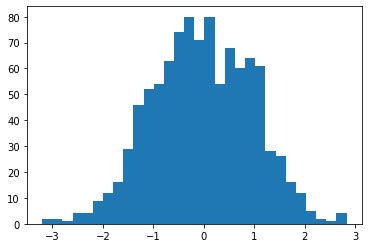

In [3]:
import matplotlib.pyplot as plt
import numpy as np

X=np.random.normal(0,1,1000)
plt.hist(X,bins=30)

In [58]:
import torch


In [78]:
from helpers import CosineWarmupScheduler, mass

# mlosses are initialized with None during the time it is not turned on, makes it easier to plot
k=3000
freq_d=3
train_nf=30
gen_net=torch.nn.Linear(10,1)
dis_net=torch.nn.Linear(10,1)
opt_g = torch.optim.Adam(gen_net.parameters())
opt_d = torch.optim.Adam(dis_net.parameters())

max_iter_d = (k - train_nf // 2)
max_iter_g =( k - train_nf)//(freq_d-1)
lr_scheduler_d = CosineWarmupScheduler(opt_d, warmup=100 ,max_iters=max_iter_d // 3)
lr_scheduler_g = CosineWarmupScheduler(opt_g, warmup=100  //(freq_d), max_iters=max_iter_g // 3)
lrd=[]
lrg=[]
stepd=[]
stepg=[]

step=0
for i in range(k):
    if i>train_nf//2:
        lr_scheduler_d.step()
        step+=1
        lrd.append(lr_scheduler_d.get_lr())
        stepd.append(i)
    if i>train_nf and step%freq_d<1:
        lr_scheduler_g.step()
        step+=1
        lrg.append(lr_scheduler_g.get_lr())
        stepg.append(i)

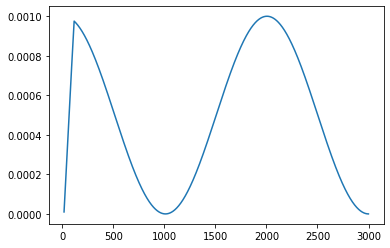

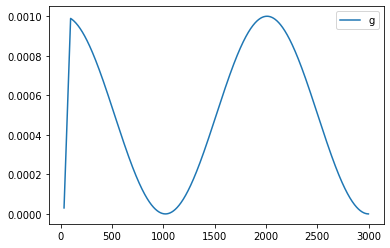

In [79]:
import matplotlib.pyplot as plt
plt.plot(stepd,lrd,label="d")
plt.show()
plt.plot(stepg,lrg,label="g",alpha=1)
plt.legend()